In [1]:
import numpy
import nengo
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

In [38]:
from nengo.utils.functions import piecewise

In [51]:
states = numpy.zeros((4, 4))
states[1][1] = 1
states[1][3] = 3
actions = numpy.array([[0, -1], [1, 0], [0, 1], [-1, 0]])
transition_prob = 1
state_repo = list()
for i in range(4):
        for j in range(4):
            state_repo.append([i, j])
state_repo = numpy.array(state_repo)
print state_repo

[[0 0]
 [0 1]
 [0 2]
 [0 3]
 [1 0]
 [1 1]
 [1 2]
 [1 3]
 [2 0]
 [2 1]
 [2 2]
 [2 3]
 [3 0]
 [3 1]
 [3 2]
 [3 3]]


In [22]:
def one_hot(location, size):
    one_hot_vector = numpy.zeros(size)
    one_hot_vector[location] = 1
    return one_hot_vector

In [79]:
def to_coordinate(vector):
    index = numpy.argmax(vector)
    coordinate_index_0 = index/4
    coordinate_index_1 = index%4
    return [coordinate_index_0, coordinate_index_1]

In [15]:
def dls(states, actions, curr_state, curr_depth, max_depth, transition_prob):
    value_list = list()
    if curr_depth == max_depth:
        return states[curr_state[0]][curr_state[1]]
    else:
        for i in actions:
            next_state = transition(curr_state, i, transition_prob)
            #if list(next_state) in visited:
             #   continue
            value = states[next_state[0]][next_state[1]] + 0.9*dls(states, actions, next_state, curr_depth+1, max_depth, transition_prob)
            value_list.append(value)
        if value_list:
            average_value = numpy.mean(numpy.array(value_list))
    return average_value


In [7]:
def transition(state, action, transition_prob):
    if numpy.random.rand() < transition_prob:
        temp = numpy.add(state, action)
        if temp[0] > 3 or temp[1] > 3 or temp[0] < 0 or temp[1] < 0:
            new_state = state
        else:
            new_state = temp

    else:
        rand_action = actions[random.choice(actions)]
        temp = states[numpy.add(state, rand_action)]
        if temp[0] > 3 or temp[1] > 3 or temp[1] < 0 or temp[1] < 0:
            new_state = state
        else:
            new_state = temp
    return new_state                         


In [110]:
model = nengo.Network()
with model:
    #states
    input_node = nengo.Node(one_hot(0, 16))
    states_ensemble = nengo.networks.EnsembleArray(n_ensembles=16, n_neurons=4000)
    nengo.Connection(input_node, states_ensemble.input)
    
    #actions
    actions_node_0 = nengo.Node(piecewise({0:actions[0], 1:actions[1], 2:actions[2], 3:actions[3]}))
    actions_ensemble = nengo.Ensemble(n_neurons=500, dimensions=2)
    nengo.Connection(actions_node_0, actions_ensemble)
    
    #curr_state
    #out_node = states_ensemble.add_output(function=to_coordinate,name="outnode")
    inter = nengo.Ensemble(n_neurons=4000, dimensions=16)
    nengo.Connection(states_ensemble.output, inter)
    state_ensemble = nengo.Ensemble(n_neurons=500, dimensions=2, radius=4)
    nengo.Connection(inter, state_ensemble, function=to_coordinate)
    nengo.Connection(actions_ensemble, state_ensemble)
    #curr_state_node = 
    #curr_depth
    #max_depth
    #transition_prob
    states_probe = nengo.Probe(states_ensemble.output)
    actions_probe = nengo.Probe(actions_ensemble)
    state_probe = nengo.Probe(state_ensemble)
    

In [111]:
sim = nengo.Simulator(model)
sim.run(5)

Building finished in 0:01:59.                                                   
Simulating finished in 0:00:34.                                                 


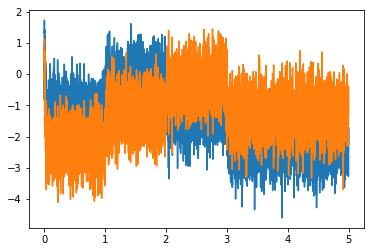

In [112]:
plt.plot(sim.trange(), sim.data[state_probe])

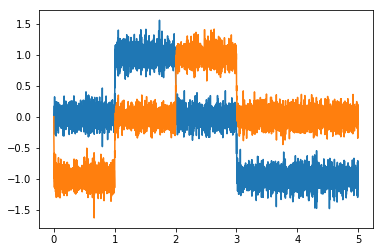

In [121]:
plt.plot(sim.trange(), sim.data[actions_probe])

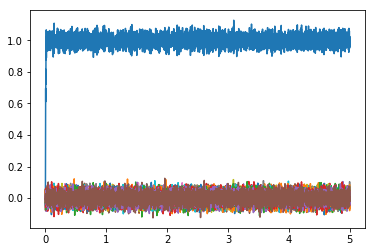

In [122]:
plt.plot(sim.trange(), sim.data[states_probe])